# Initial data preprocessing

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import networkx as nx 
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Load baseline sample 
data = pd.read_csv('2018-10-17 C_Tbl_Report_Snow_App_Node_Rack_Chain_VS_BE_Mav.csv',sep = ";", encoding = 'latin1') #reference

In [3]:
# Preprocessing 1
col = data.columns
for i in range(0,len(col)):
    data[col[i]].fillna('?', inplace=True)

In [4]:
# Preprocessing 2
col = data.columns
total = 0
for i in range(0,len(col)-1):
    list = []
    temp = '#_NO_' + col[i]
    subtotal = 0
    for j in range(0,len(data)):
        if data.iloc[j,i] == '?':
            list.append(j)
            subtotal+=1
    #print(temp,subtotal)
    total+=subtotal
    data[col[i]].iloc[[list]] = temp
print(total)

9440805


# Extraction of Nodes

In [5]:
#services = data.RS_0_Class.unique()
services = data.RS_0_Name.unique()
apps = data.APP_Name.unique()

# Graph Creation

In [ ]:
g = nx.Graph()
color_map = []
for i in range (0,len(apps)):
    g.add_node(apps[i], color='gold', type = 'app')
for i in range (0,len(services)):
    g.add_node(services[i], color='cyan', type = 'service')
    
for i in range (0,len(data)):
    if data.iloc[i,18] != '#_NO_RS_0_Class':
        if data.iloc[i,18] == 'u_cmdb_sqlserver':
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='DB',color = 'blue', weight=1)
        if data.iloc[i,18] == 'u_cmdb_oracle':
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='DB',color = 'darkblue', weight=1)
        if data.iloc[i,18] == 'u_cmdb_sybase':
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='DB',color = 'royalblue', weight=1)
        if data.iloc[i,18] == 'u_cmdb_database':
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='DB',color = 'grey', weight=1)
        if data.iloc[i,18] == 'u_cmdb_mysql':
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='DB',color = 'darkblue', weight=1)
        if data.iloc[i,18] == 'u_cmdb_ing_xfb' :
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='XFB',color = 'green', weight=1)
        if data.iloc[i,18] == 'u_cmdb_ing_cassandra' :
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='DB',color = 'navy', weight=1)   
        if data.iloc[i,18] == 'u_cmdb_tomcat' :
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='WEB',color = 'lightcoral', weight=1) 
        if data.iloc[i,18] == 'u_cmdb_apache' :
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='WEB',color = 'indianred', weight=1) 
        if data.iloc[i,18] == 'u_cmdb_j2eeserver' :
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='WEB',color = 'brown', weight=1) 
        if data.iloc[i,18] == 'u_cmdb_webspheremq' :
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='WEB',color = 'firebrick', weight=1) 
        if data.iloc[i,18] == 'u_cmdb_websphereas' :
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='WEB',color = 'maroon', weight=1) 
        if data.iloc[i,18] == 'u_cmdb_iis' :
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='WEB',color = 'darkred', weight=1)  
        if data.iloc[i,18] == 'u_cmdb_messaging_server' :
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='WEB',color = 'salmon', weight=1)             
        if data.iloc[i,18] == 'u_cmdb_mainframe_subsystem' :
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='MF',color = 'red', weight=1)             
        if data.iloc[i,18] == 'u_cmdb_running_software' :
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='SWR',color = 'grey', weight=1) 
        if data.iloc[i,18] == 'u_cmdb_application_server' :
            g.add_edge(data.iloc[i,2], data.iloc[i,16], type='APP',color = 'gray', weight=1) 

# Graph Query (Internal) 

In [ ]:
#query = 'NSP-SF'
query = input('Application:')
while query != 'exit':   
    for i in nx.all_neighbors(g,query):
        print(query,'-',i)
    print()
    query = input('Application:')

Application:NSP-SF
NSP-SF - ORACLE 11.2.0.4 ON SBEPAEBC_[SBEPAEBC]
NSP-SF - ORACLE 11.2.0.4 ON SBEPAEBD_[SBEPAEBD]
NSP-SF - OPSCENTER_CASSANDRA_ON_SBELP10160_[SBELP10160]
NSP-SF - OPSCENTER_CASSANDRA_ON_SBELP10161_[SBELP10161]
NSP-SF - NSP_NGINX_CUSTOMERS_ON_SBELP00731_[SBELP00731]
NSP-SF - NSP_NGINX_CUSTOMERS_ON_SBELP00732_[SBELP00732]
NSP-SF - NSP_NGINX_EMPLOYEES_ON_SBELP00771_[SBELP00771]
NSP-SF - NSP_NGINX_EMPLOYEES_ON_SBELP00772_[SBELP00772]
NSP-SF - SLAUTHORIZATION.ear on SBELP00733_[SBELP00733]
NSP-SF - SLAUTHORIZATION.ear on SBELP00734_[SBELP00734]
NSP-SF - XFB_CFT_ON_SBELP00460_[SBELP00460]
NSP-SF - XFB_CFT_ON_SBELP00461_[SBELP00461]
NSP-SF - WAS_ON_SBELP00733_[SBELP00733]
NSP-SF - WAS_ON_SBELP00734_[SBELP00734]
NSP-SF - WAS_ON_SBELP10779_[SBELP10779]
NSP-SF - WAS_ON_SBELP10780_[SBELP10780]
NSP-SF - WAS_ON_SBELP10499_[SBELP10499]
NSP-SF - WAS_ON_SBELP10500_[SBELP10500]
NSP-SF - WAS_ON_SBELP10879_[SBELP10879]
NSP-SF - WAS_ON_SBELP10880_[SBELP10880]
NSP-SF - WAS_ON_SBELP10881_[S

# Graph Metrics 

In [15]:
# Extract reference graph facts & metrics 

print('Reference Graph')
print('Do we have a fully connected graph? ',nx.is_connected(g))
h = g.to_directed()
N, K = h.order(), h.size()
avg_deg= float(K) / N
print ("# Applications & Services: ", len(apps)+len(services))
print ("# Nodes: ", N)
print ("# Edges: ", K)
print ("Average connectivity degree: ", avg_deg)
# Extract reference graph facts & metrics 
print ("SCC-strongly connected components: ", nx.number_strongly_connected_components(h))
print ("WCC-weakly connected components: ", nx.number_weakly_connected_components(h))
in_degrees= h.in_degree() # dictionary node:degree
#in_values= sorted(set(in_degrees.values()))

Reference Graph
Do we have a fully connected graph?  False
# Applications & Services:  6806
# Nodes:  6806
# Edges:  16628
Average connectivity degree:  2.4431384072876874
SCC-strongly connected components:  324
WCC-weakly connected components:  324


# Graph Drawing

In [16]:
# Put nodes in color
for n1, attr in g.nodes(data=True):
    if attr['type'] == 'app':
        color_map.append('gold')
    else: 
        if attr['type'] == 'services':
            color_map.append('cyan')
        else: 
            color_map.append('red')

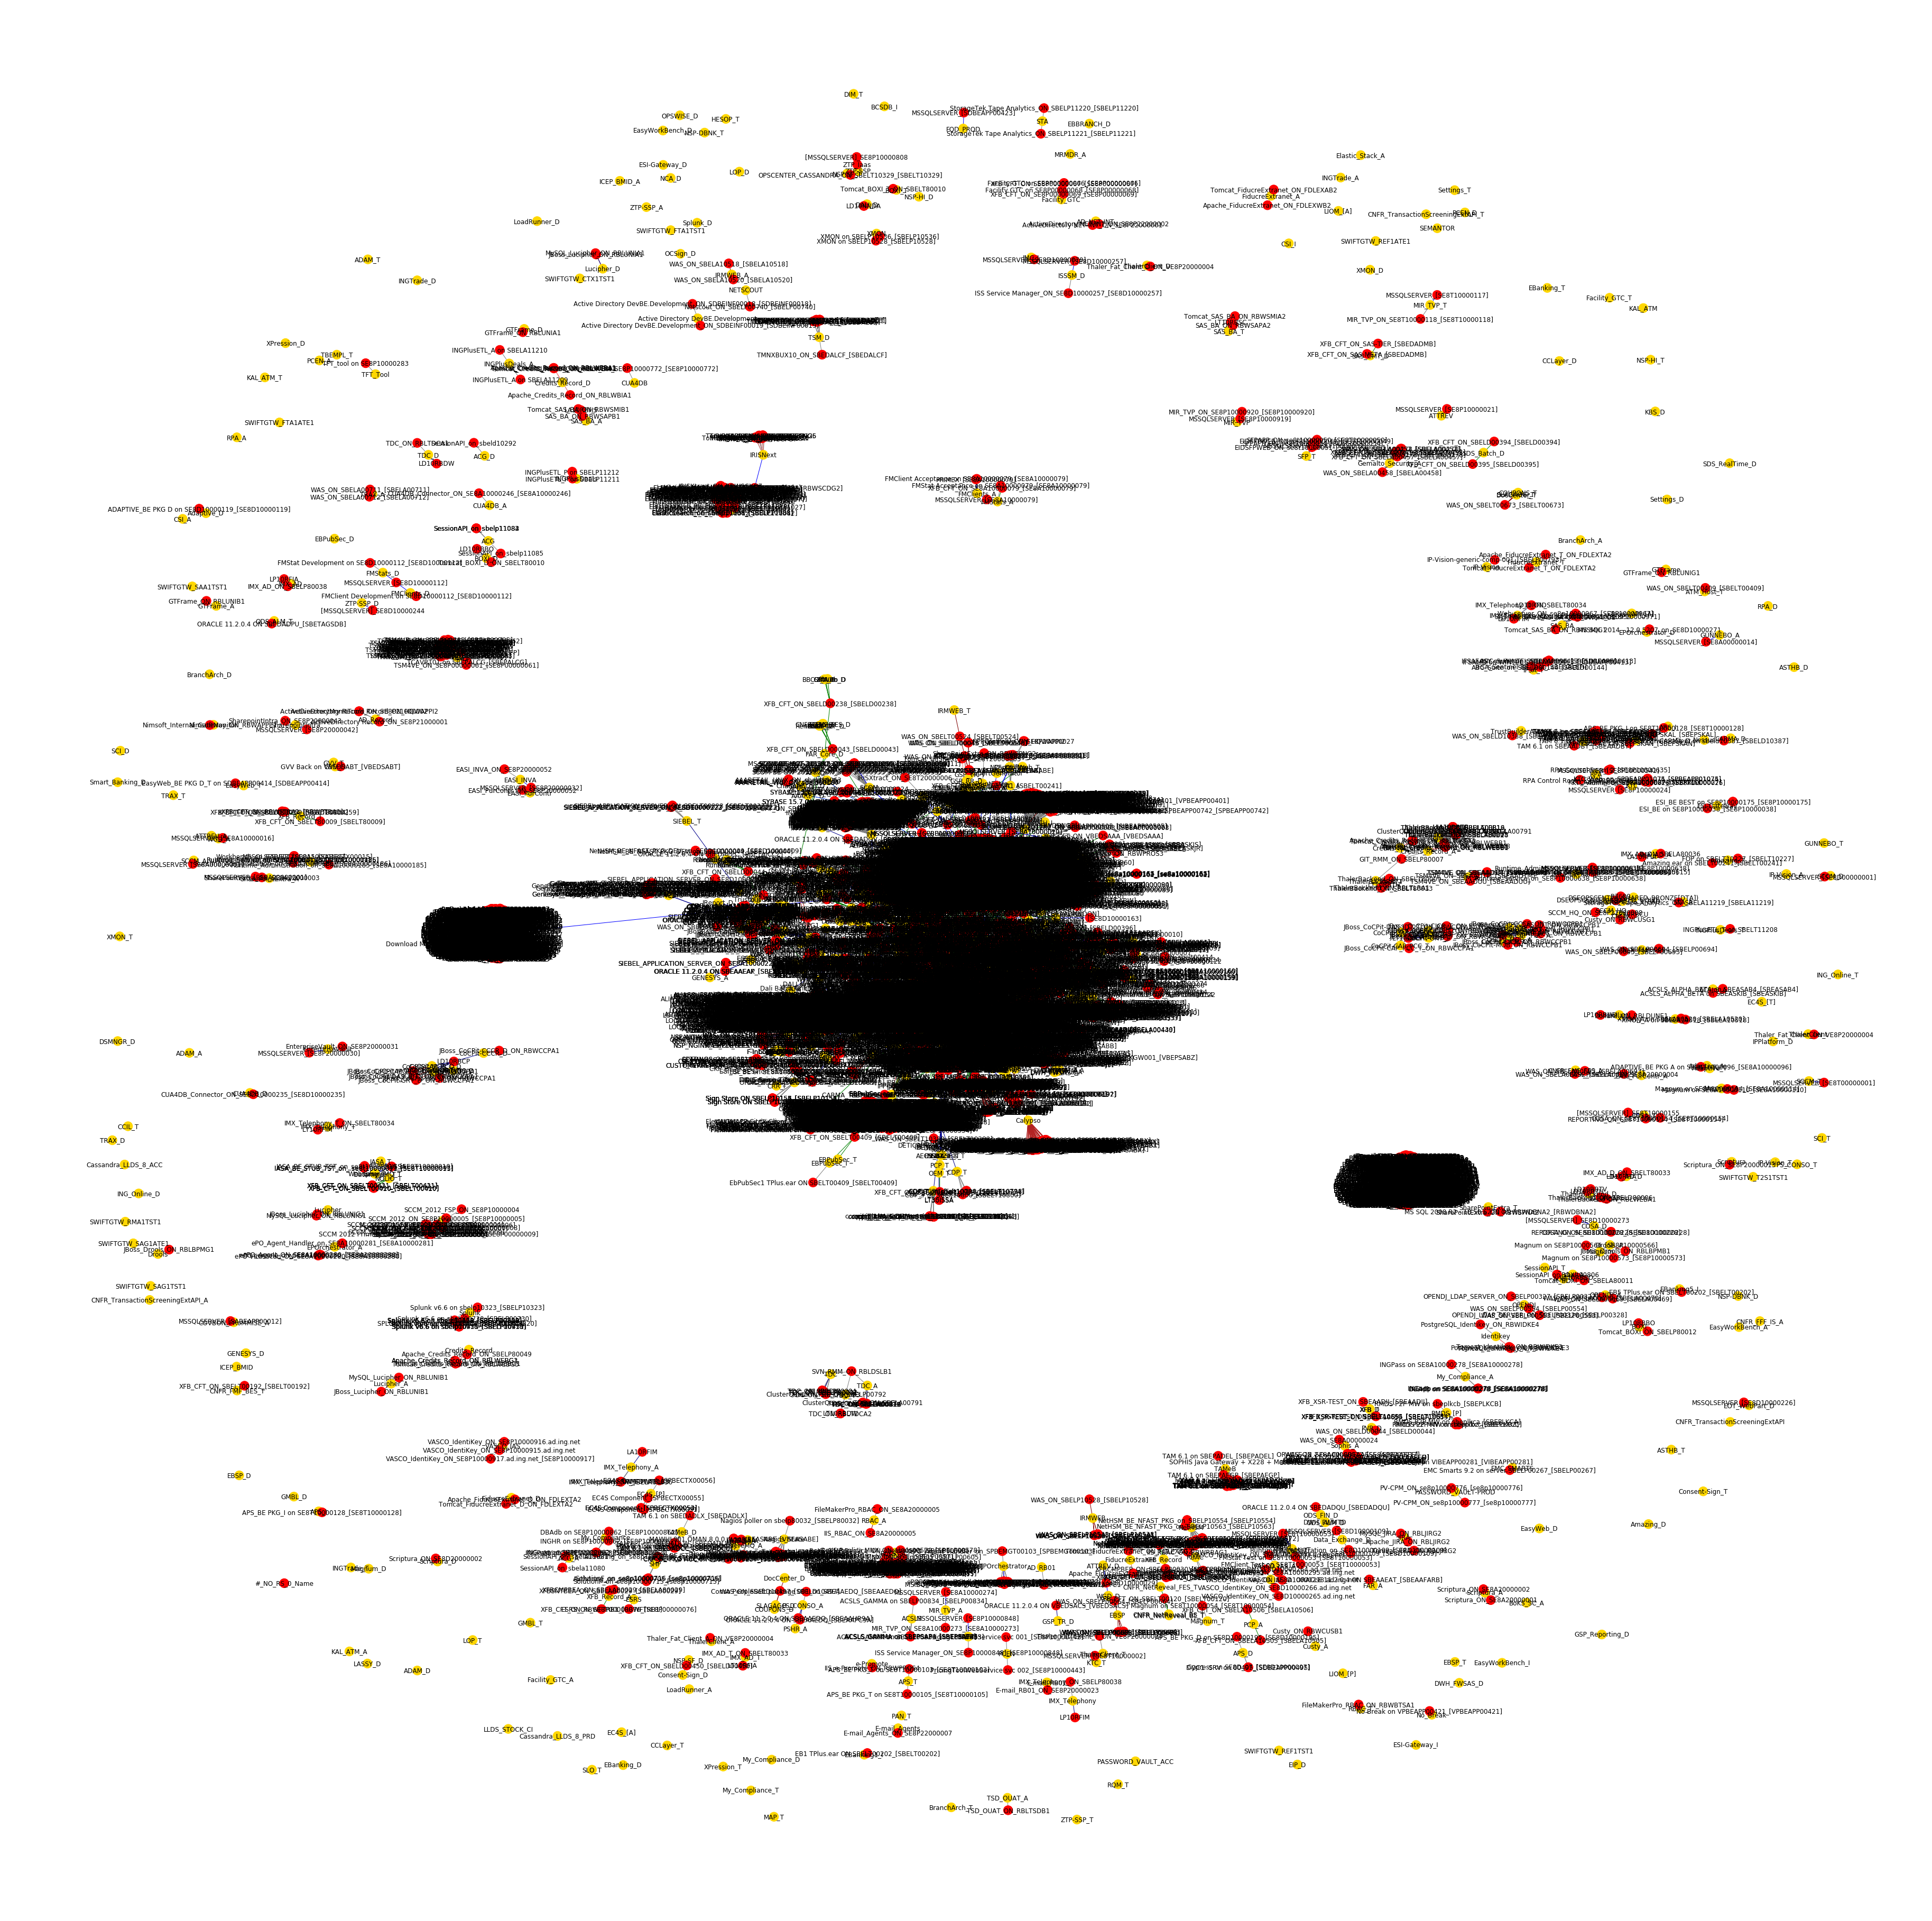

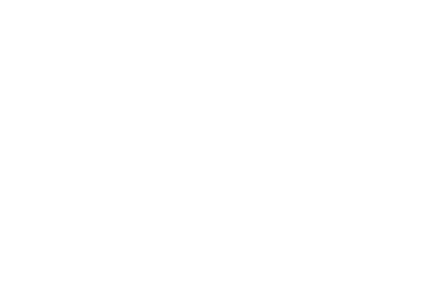

<Figure size 432x288 with 0 Axes>

In [17]:
# Drawing Graph
plt.figure(3,figsize=(50,50))  
edges = g.edges()
colors = [g[u][v]['color'] for u,v in edges]
nx.draw(g,node_color = color_map, edge_color = colors, with_labels = True)
plt.show()
plt.savefig('graph.png')
Image(filename='graph.png')

In [ ]:
#data[data['RS_0_Class'] == 'u_cmdb_websphereas']

In [7]:
#data['RS_0_Class'].unique()

array(['u_cmdb_sqlserver', 'u_cmdb_ing_xfb', 'u_cmdb_webspheremq',
       '#_NO_RS_0_Class', 'u_cmdb_oracle', 'u_cmdb_websphereas',
       'u_cmdb_running_software', 'u_cmdb_application_server',
       'u_cmdb_sybase', 'u_cmdb_database', 'u_cmdb_apache',
       'u_cmdb_tomcat', 'u_cmdb_ing_cassandra', 'u_cmdb_j2eeserver',
       'u_cmdb_messaging_server', 'u_cmdb_iis', 'u_cmdb_mysql',
       'u_cmdb_mainframe_subsystem'], dtype=object)

# Technical part

In [6]:
# Print dataframe layout
col = data.columns
for i in range(0,len(col)):
    print(i,col[i],'-->', data.iloc[1,i])

0 APP_BUS_Unit --> #_NO_APP_BUS_Unit
1 APP_CAG --> #_NO_APP_CAG
2 APP_Name --> #_NO_APP_Name
3 APP_Env --> #_NO_APP_Env
4 APP_Class --> #_NO_APP_Class
5 APP_ING_Category --> #_NO_APP_ING_Category
6 APP_CC --> #_NO_APP_CC
7 APP_RES_Rel --> #_NO_APP_RES_Rel
8 APP_RES_CAG --> #_NO_APP_RES_CAG
9 APP_RES_Name --> #_NO_APP_RES_Name
10 APP_RES_Env --> #_NO_APP_RES_Env
11 APP_RES_Class --> #_NO_APP_RES_Class
12 APP_RES_ING_Category --> #_NO_APP_RES_ING_Category
13 APP_RES_CC --> #_NO_APP_RES_CC
14 RS_0_Rel --> #_NO_RS_0_Rel
15 RS_0_CAG --> #_NO_RS_0_CAG
16 RS_0_Name --> MSSQLSERVER_[CE8A10000051]
17 RS_0_Env --> #_NO_RS_0_Env
18 RS_0_Class --> u_cmdb_sqlserver
19 RS_0_ING_Category --> #_NO_RS_0_ING_Category
20 RS_0_CC --> #_NO_RS_0_CC
21 APP_SYS_Rel --> #_NO_APP_SYS_Rel
22 APP_SYS_CAG --> #_NO_APP_SYS_CAG
23 APP_SYS_Name --> #_NO_APP_SYS_Name
24 APP_SYS_Env --> #_NO_APP_SYS_Env
25 APP_SYS_Class --> #_NO_APP_SYS_Class
26 APP_SYS_ING_Category --> #_NO_APP_SYS_ING_Category
27 APP_SYS_CC --> #_NO_

In [ ]:
#data.to_csv("truc.csv")

In [13]:
apps

array(['#_NO_APP_Name', 'CSI', 'SAS_BA_A', ..., 'FMStats_D', 'FMStats_T',
       'FlexING'], dtype=object)